In [40]:
import copy
import pandas
import warnings
import subprocess
from matplotlib import pyplot as plt
import os
import sys

sys.path.insert(0, "../src")
# csv_orig_file = "../datasets/genny2/summary.csv"
# csv_new_file = "/tmp/summary.csv"

# csv_orig_file = "../datasets/genny2/summary.csv"

# csv_orig_file = "../datasets/genny2/perf_stack.csv"
# csv_orig_file = "../datasets/genny2/perf_stack2.csv"

csv_new_file = "../datasets/genny2/perf_stack2.csv"

#csv_new_file = "../datasets/genny2/fle_perf_stack2_query_in.csv"

# csv_new_file = "../datasets/genny2/fle_perf_stack2_query_in_scale.csv"

csv_orig_file = "../datasets/genny2/fle_perf_txn_sync.csv"
# csv_new_file = "../datasets/genny2/fle_perf_stack_rachita.csv"


In [44]:

pd = pandas.read_csv(csv_orig_file)
pd

,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMin,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal
0,0,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,1.789434e+07,...,1,1,9.675381e+07,7592872.0,1.794983e+12,0.0,100000.0,100000.0,15638311.0,5.635755e+09
1,1,query_es3_1_1.q1.reads,query_es3_1_1,es3,q1.reads,fixed_1: fixed_hf,1,1,1,2.198837e+07,...,1,1,3.238235e+07,21545236.0,2.202660e+11,0.0,10000.0,10000.0,3550000.0,1.795453e+12
2,2,query_es3_1_1.q2.reads,query_es3_1_1,es3,q2.reads,fixed_1: uar,2,1,1,9.246242e+06,...,1,1,1.016974e+08,7842864.0,9.314800e+10,0.0,10000.0,10000.0,3661988.0,2.016179e+12
3,3,query_es3_1_1.q3.reads,query_es3_1_1,es3,q3.reads,"uar_[1,5]: uar",3,1,1,7.537190e+06,...,1,1,1.016950e+08,466828.0,7.585800e+10,0.0,10000.0,10000.0,3664433.0,2.109753e+12
4,4,query_es3_1_1.q4.reads,query_es3_1_1,es3,q4.reads,"uar_[1,5]: uar_alllow",4,1,1,6.886857e+06,...,1,1,1.135580e+07,464103.0,6.934500e+10,0.0,10000.0,10000.0,3667266.0,2.186230e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,query_es3_16_16.load.inserts,query_es3_16_16,es3,load.inserts,load,load,16,16,6.883739e+07,...,16,16,1.328178e+10,11989780.0,4.406150e+11,0.0,100000.0,100000.0,15638311.0,1.590997e+11
76,76,query_es3_16_16.q1.reads,query_es3_16_16,es3,q1.reads,fixed_1: fixed_hf,1,16,16,1.932913e+08,...,16,16,3.482357e+08,80405243.0,1.211640e+11,0.0,10000.0,10000.0,3560000.0,7.205382e+12
77,77,query_es3_16_16.q2.reads,query_es3_16_16,es3,q2.reads,fixed_1: uar,2,16,16,1.588316e+08,...,16,16,3.434582e+08,60206386.0,9.986300e+10,0.0,10000.0,10000.0,3660662.0,9.147641e+12
78,78,query_es3_16_16.q3.reads,query_es3_16_16,es3,q3.reads,"uar_[1,5]: uar",3,16,16,1.270469e+08,...,16,16,3.635020e+08,493608.0,7.988900e+10,0.0,10000.0,10000.0,3665129.0,1.075595e+13


<AxesSubplot: title={'center': 'NEW ES2 Load: Average Latency'}, xlabel='ContentionFactor', ylabel='Average Latency'>

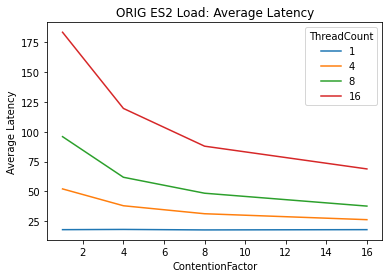

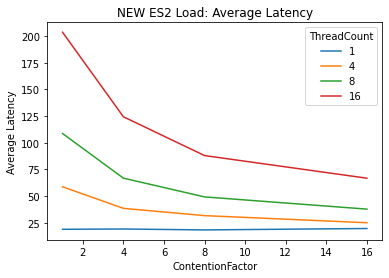

In [45]:
# Make a pivot table for average latency for load and graph it
query = "QueryNumber == 'load' & Experiment == 'es3'"

pd_orig = pandas.read_csv(csv_orig_file)

# un_pd1_orig = pd_orig.query("QueryNumber == 'load' & Experiment == 'es1'")
#un_piv_orig = un_pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd1_orig = pd_orig.query(query)
piv_orig = pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

pd_new = pandas.read_csv(csv_new_file)
pd1_new = pd_new.query(query)
piv_new = pd1_new.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")


# un_pd1_orig.plot(title="ORIG ES1 Load: Average Latency", ylabel="Average Latency")

piv_orig.plot(title="ORIG ES2 Load: Average Latency", ylabel="Average Latency")
piv_new.plot(title="NEW ES2 Load: Average Latency", ylabel="Average Latency")


In [41]:
query = "QueryNumber == 'load' & Experiment == 'es3'"

def get_data(csv_file):
    pd_orig = pandas.read_csv(csv_file)

    # un_pd1_orig = pd_orig.query("QueryNumber == 'load' & Experiment == 'es1'")
    #un_piv_orig = un_pd1_orig.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

    pd1_orig = pd_orig.query(query)

    return pd1_orig[['TaskName', 'ContentionFactor', 'ThreadCount', 'AverageLatencyMillis', 'OperationThroughput']]

#pd1_orig
o = get_data(csv_orig_file)
n = get_data(csv_new_file)

t = o
t["Rachita_AvgLatMillis"] = n["AverageLatencyMillis"]
t["Rachita_OpThr"] = n["OperationThroughput"]

t["AvgLatMillis(Rachita - Baseline TXN Sync)"] = t["Rachita_AvgLatMillis"] - t["AverageLatencyMillis"]
t["OpTh(Rachita - Baseline TXN Sync)"] = t["Rachita_OpThr"] - t["OperationThroughput"]

t

,TaskName,ContentionFactor,ThreadCount,AverageLatencyMillis,OperationThroughput,Rachita_AvgLatMillis,Rachita_OpThr,AvgLatMillis(Rachita - Baseline TXN Sync),OpTh(Rachita - Baseline TXN Sync)
0,query_es3_1_1,1,1,17.894338,55.710834,18.935644,52.618009,1.041307,-3.092825
5,query_es3_1_4,1,4,52.080373,73.503577,58.754698,65.768359,6.674325,-7.735219
10,query_es3_1_8,1,8,95.905372,80.247676,108.670669,70.759690,12.765296,-9.487986
15,query_es3_1_16,1,16,183.473801,82.767891,203.535611,75.346027,20.061811,-7.421864
20,query_es3_4_1,4,1,18.087681,55.107835,19.208720,51.905045,1.121039,-3.202790
25,query_es3_4_4,4,4,37.954225,102.291430,38.556068,97.436542,0.601844,-4.854888
30,query_es3_4_8,4,8,61.841794,125.048144,66.836079,114.760627,4.994285,-10.287517
35,query_es3_4_16,4,16,119.571719,127.466152,124.321466,122.466775,4.749748,-4.999377
40,query_es3_8_1,8,1,17.682831,56.329079,18.355327,54.275115,0.672495,-2.053964
45,query_es3_8_4,8,4,31.254402,126.083212,31.740885,123.867234,0.486483,-2.215978


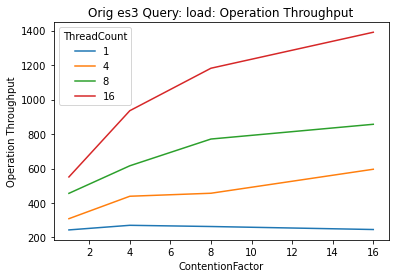

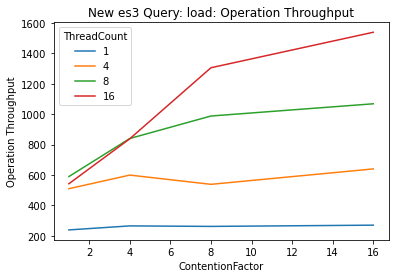

In [10]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

plot_operation_throughput(csv_orig_file, "Orig", "load", "es3")
# plot_operation_throughput(csv_orig_file, "Orig", "load", "es2")
plot_operation_throughput(csv_new_file, "New", "load", "es3")

# plot_operation_throughput(csv_new_file, "New", "1", "es2")
# plot_operation_throughput(csv_orig_file, "Orig", "1", "es3")
# plot_operation_throughput(csv_new_file, "New", "1", "es3")
# plot_operation_throughput(csv_new_file, "New", "5", "es2")
# plot_operation_throughput(csv_new_file, "New", "6", "es2")

# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es2")
# plot_operation_throughput(csv_orig_file, "Baseline", "1", "es3")
# plot_operation_throughput(csv_new_file, "New", "5", "es2")
# plot_operation_throughput(csv_new_file, "New", "6", "es2")

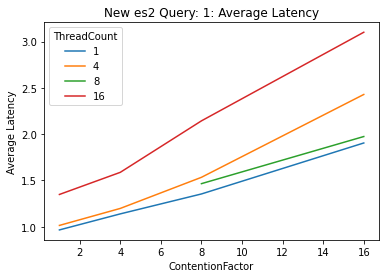

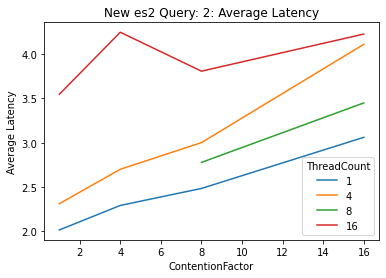

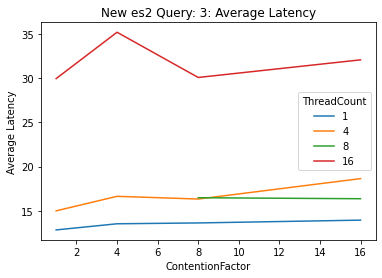

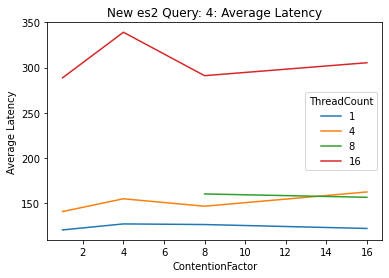

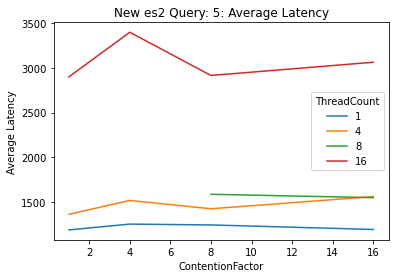

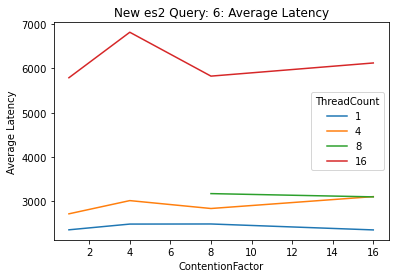

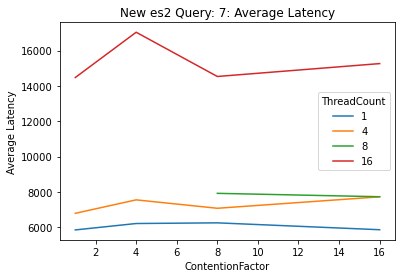

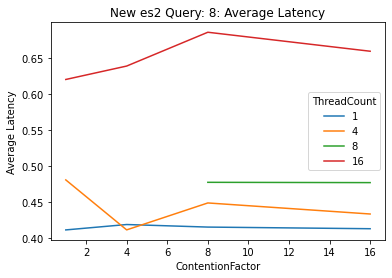

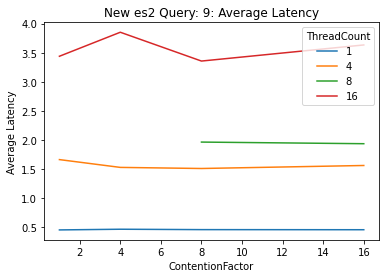

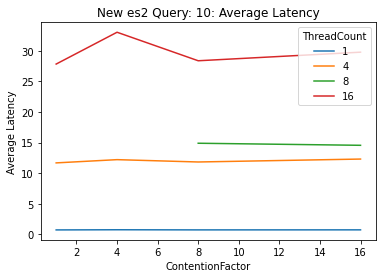

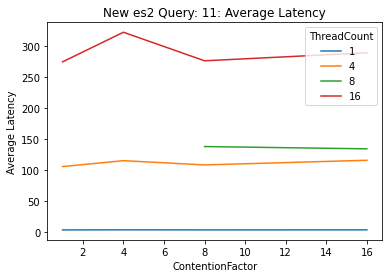

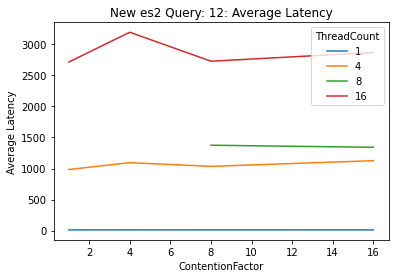

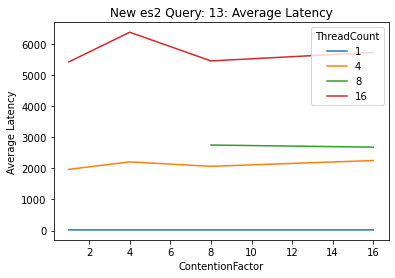

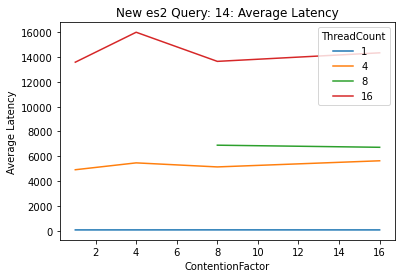

In [6]:
def plot_average_latency(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")

    piv.plot(title=f"{title} {experiment} Query: {query}: Average Latency", ylabel="Average Latency (Milliseconds)")

# query = "7"
# experiment = "es2"
# pd = pandas.read_csv(csv_new_file)
# pd1 = pd.query(f"(QueryNumber == '2' or QueryNumber == '3') & Experiment == '{experiment}'")
# piv = pd1
#piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
# piv
plot_average_latency(csv_new_file, "New", "1", "es2")
plot_average_latency(csv_new_file, "New", "2", "es2")
plot_average_latency(csv_new_file, "New", "3", "es2")
plot_average_latency(csv_new_file, "New", "4", "es2")
plot_average_latency(csv_new_file, "New", "5", "es2")
plot_average_latency(csv_new_file, "New", "6", "es2")
plot_average_latency(csv_new_file, "New", "7", "es2")
plot_average_latency(csv_new_file, "New", "8", "es2")
plot_average_latency(csv_new_file, "New", "9", "es2")
plot_average_latency(csv_new_file, "New", "10", "es2")
plot_average_latency(csv_new_file, "New", "11", "es2")
plot_average_latency(csv_new_file, "New", "12", "es2")
plot_average_latency(csv_new_file, "New", "13", "es2")

plot_average_latency(csv_new_file, "New", "14", "es2")

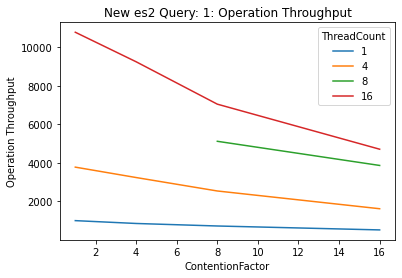

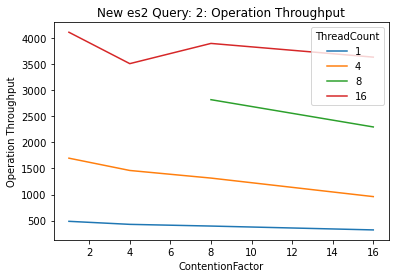

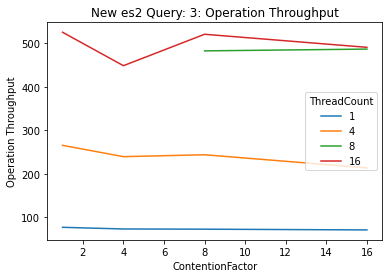

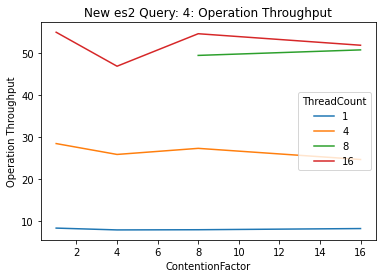

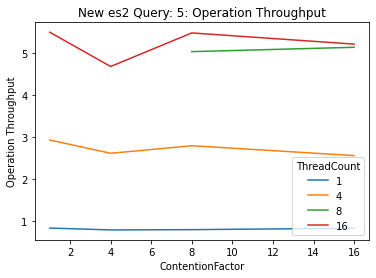

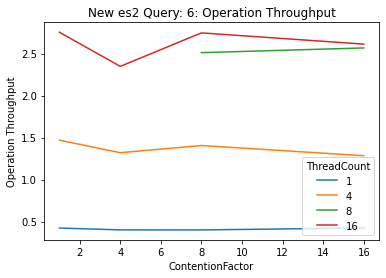

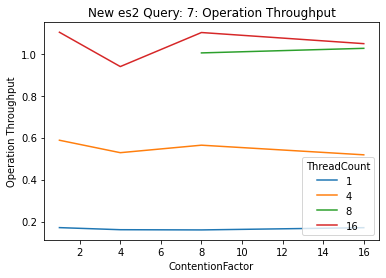

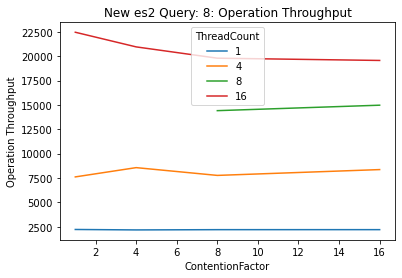

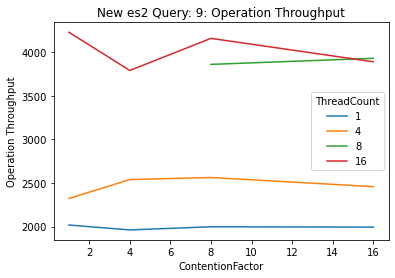

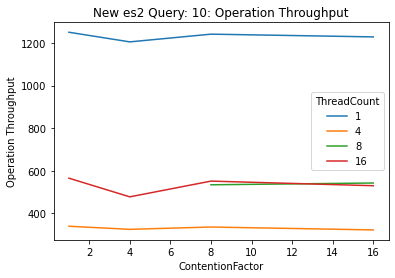

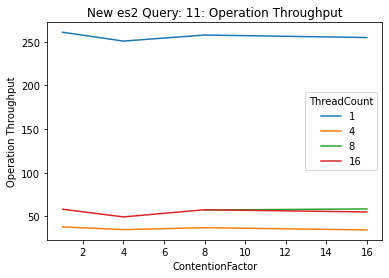

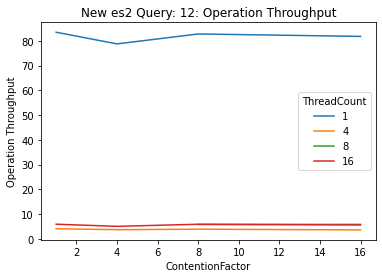

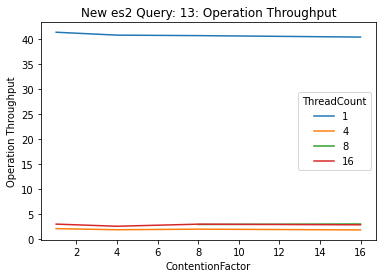

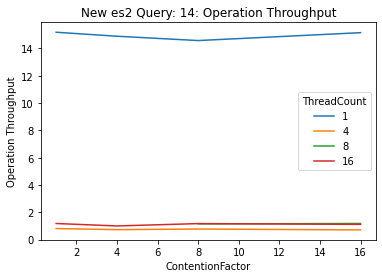

In [4]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

# query = "7"
# experiment = "es2"
# pd = pandas.read_csv(csv_new_file)
# pd1 = pd.query(f"(QueryNumber == '2' or QueryNumber == '3') & Experiment == '{experiment}'")
# piv = pd1
#piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
# piv
plot_operation_throughput(csv_new_file, "New", "1", "es2")
plot_operation_throughput(csv_new_file, "New", "2", "es2")
plot_operation_throughput(csv_new_file, "New", "3", "es2")
plot_operation_throughput(csv_new_file, "New", "4", "es2")
plot_operation_throughput(csv_new_file, "New", "5", "es2")
plot_operation_throughput(csv_new_file, "New", "6", "es2")
plot_operation_throughput(csv_new_file, "New", "7", "es2")
plot_operation_throughput(csv_new_file, "New", "8", "es2")
plot_operation_throughput(csv_new_file, "New", "9", "es2")
plot_operation_throughput(csv_new_file, "New", "10", "es2")
plot_operation_throughput(csv_new_file, "New", "11", "es2")
plot_operation_throughput(csv_new_file, "New", "12", "es2")
plot_operation_throughput(csv_new_file, "New", "13", "es2")

plot_operation_throughput(csv_new_file, "New", "14", "es2")


In [53]:
file_name = csv_new_file
query = "load"
experiment = "es1"

# Make a pivot table for operation throughput for query and graph it
pd = pandas.read_csv(file_name)
pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv

#piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

ThreadCount
ContentionFactor


In [20]:
pd_orig = pandas.read_csv(csv_orig_file)

pd_orig1 = pd_orig.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_orig1["Source"] = "Orig"
#pd_orig1['Source'] = pd_orig1['QueryNumber'].map(lambda x : "Orig")
# pd_orig1.add( df2, fill_value=0 )

#pd_orig1
pd_new = pandas.read_csv(csv_new_file)
pd_new1 = pd_new.query("QueryNumber == 'load' & Experiment == 'es3'")
pd_new1["Source"] = "New"
pd_new1

pd2 = pandas.concat([pd_orig1, pd_new1], ignore_index=True)
pd2


/tmp/ipykernel_2486705/3998469215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_orig1["Source"] = "Orig"
/tmp/ipykernel_2486705/3998469215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_new1["Source"] = "New"


,Unnamed: 0,Task,TaskName,Experiment,Phase,Query,QueryNumber,ContentionFactor,ThreadCount,AverageLatency,...,WorkersMax,LatencyMax,LatencyMin,DurationTotal,ErrorsTotal,OperationsTotal,DocumentsTotal,SizeTotal,OverheadTotal,Source
0,100,query_es3_1_1.load.inserts,query_es3_1_1,es3,load.inserts,load,load,1,1,2.834882e+07,...,1,7.968172e+07,11075901.0,2.843315e+12,0.0,100000.0,100000.0,15638311.0,8.516556e+09,Orig
1,105,query_es3_1_4.load.inserts,query_es3_1_4,es3,load.inserts,load,load,1,4,8.348018e+07,...,4,3.154254e+10,15171528.0,2.170267e+12,0.0,100000.0,100000.0,15638311.0,1.693608e+10,Orig
2,110,query_es3_1_8.load.inserts,query_es3_1_8,es3,load.inserts,load,load,1,8,1.617055e+08,...,8,3.377118e+10,25603698.0,2.112300e+12,0.0,100000.0,100000.0,15638311.0,4.755534e+10,Orig
3,115,query_es3_1_16.load.inserts,query_es3_1_16,es3,load.inserts,load,load,1,16,3.363745e+08,...,16,4.269554e+10,9349045.0,2.166984e+12,0.0,100000.0,100000.0,15638311.0,1.644225e+11,Orig
4,120,query_es3_4_1.load.inserts,query_es3_4_1,es3,load.inserts,load,load,4,1,2.786549e+07,...,1,7.822590e+07,9983248.0,2.795532e+12,0.0,100000.0,100000.0,15638311.0,9.066991e+09,Orig
5,125,query_es3_4_4.load.inserts,query_es3_4_4,es3,load.inserts,load,load,4,4,6.223929e+07,...,4,1.340561e+10,14666274.0,1.581012e+12,0.0,100000.0,100000.0,15638311.0,1.618154e+10,Orig
6,130,query_es3_4_8.load.inserts,query_es3_4_8,es3,load.inserts,load,load,4,8,1.191094e+08,...,8,1.847259e+10,25703709.0,1.515554e+12,0.0,100000.0,100000.0,15638311.0,4.409853e+10,Orig
7,135,query_es3_4_16.load.inserts,query_es3_4_16,es3,load.inserts,load,load,4,16,2.493982e+08,...,16,3.178302e+10,23527687.0,1.607060e+12,0.0,100000.0,100000.0,15638311.0,1.718888e+11,Orig
8,140,query_es3_8_1.load.inserts,query_es3_8_1,es3,load.inserts,load,load,8,1,2.745365e+07,...,1,7.786848e+07,10266226.0,2.752037e+12,0.0,100000.0,100000.0,15638311.0,6.761936e+09,Orig
9,145,query_es3_8_4.load.inserts,query_es3_8_4,es3,load.inserts,load,load,8,4,4.974220e+07,...,4,7.276492e+09,13830243.0,1.250405e+12,0.0,100000.0,100000.0,15638311.0,1.454920e+10,Orig


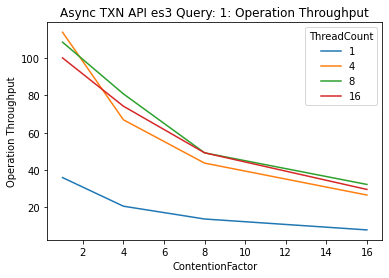

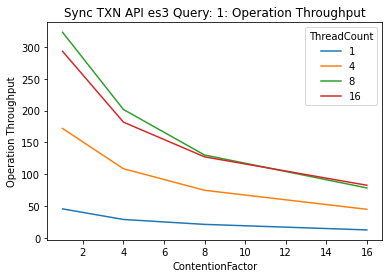

In [18]:
def plot_operation_throughput(file_name, title, query, experiment):
    # Make a pivot table for operation throughput for query and graph it
    pd = pandas.read_csv(file_name)
    pd1 = pd.query(f"QueryNumber == '{query}' & Experiment == '{experiment}'")
    piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")

    piv.plot(title=f"{title} {experiment} Query: {query}: Operation Throughput", ylabel="Operation Throughput")

plot_operation_throughput(csv_orig_file, "Async TXN API", "1", "es3")
plot_operation_throughput(csv_new_file, "Sync TXN API", "1", "es3")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="AverageLatencyMillis")
piv.plot(title="ES3 Query 2: Average Latency", ylabel="Average Latency (ms)")


In [ ]:
# Make a pivot table for average latency for query and graph it
pd = pandas.read_csv(csv_file)
pd1 = pd.query("QueryNumber == '2' & Experiment == 'es3'")
piv = pd1.pivot(index='ContentionFactor', columns="ThreadCount", values="OperationThroughput")
piv.plot(title="ES3 Query 2: Operation Throughput", ylabel="Operation Throughput")